In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [2]:
import pandas as pd
df = pd.read_csv('Tour_Winners_data_1.csv')
Data1 = df.head(103)
Data1


,Year,Tour_No,Winner,Country,Team,Tour_overall_length_(km),age,BMI,weight_(Kg),height_(m),rider_type_(PPS),close_rider_type_(PPS)
0,2023,110,Jonas Vingegaard,Denmark,Team Jumbo Visma,3406,25,19.6,60.0,1.749636,climber,NaN
1,2022,109,Jonas Vingegaard,Denmark,Team Jumbo Visma,3328,25,19.6,60.0,1.749636,climber,NaN
2,2021,108,Tadej Pogacar,Slovenia,UAE Team Emirates,3383,22,21.3,66.0,1.760282,climber,NaN
3,2020,107,Tadej Pogacar,Slovenia,UAE Team Emirates,3482,21,21.3,66.0,1.760282,climber,NaN
4,2019,106,Egan Bernal,Colombia,Team Ineos,3366,22,19.6,60.0,1.749636,climber,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
98,1914,12,Philippe Thys,Belgium,Cycles Peugeot,5380,24,NaN,NaN,NaN,climber,sprinter
99,1913,11,Philippe Thys,Belgium,Cycles Peugeot,5287,23,NaN,NaN,NaN,climber,sprinter
100,1912,10,Odile Defraye,Belgium,Alycon,5289,24,NaN,NaN,NaN,sprinter,climber
101,1911,9,Gustave Garrigou,France,Alycon,5344,27,NaN,NaN,NaN,climber,NaN


In [3]:
df = pd.read_csv('Tour_Winners_data_2.csv')
Data2 = df.head(103)
Data2

,Year,Tour_No,Winner,pre_tour_GC_wins,pre_tour_wins,total_completed_stage_races,total_completed_day_races
0,2023,110,Jonas Vingegaard,3,11,5,1
1,2022,109,Jonas Vingegaard,0,2,4,7
2,2021,108,Tadej Pogacar,3,4,4,7
3,2020,107,Tadej Pogacar,1,4,3,6
4,2019,106,Egan Bernal,2,1,4,7
...,...,...,...,...,...,...,...
98,1914,12,Philippe Thys,0,1,0,2
99,1913,11,Philippe Thys,0,0,0,1
100,1912,10,Odile Defraye,1,4,1,2
101,1911,9,Gustave Garrigou,0,1,0,5


In [4]:
df = pd.read_csv('Tour_Winners_data_3.csv')
Data3 = df.head(103)
Data3

,Year,Tour_No,Winner,GT_wins,NAT _TT_wins,NAT_RR_wins,Worlds_RR_ wins
0,2023,110,Jonas Vingegaard,1,0,0,0
1,2022,109,Jonas Vingegaard,0,0,0,0
2,2021,108,Tadej Pogacar,1,1,1,0
3,2020,107,Tadej Pogacar,0,1,1,0
4,2019,106,Egan Bernal,0,0,0,0
...,...,...,...,...,...,...,...
98,1914,12,Philippe Thys,1,0,0,0
99,1913,11,Philippe Thys,0,0,0,0
100,1912,10,Odile Defraye,0,0,1,0
101,1911,9,Gustave Garrigou,0,0,0,0


For the models I decided to create add a synthetic set of non winners to add to the past winners dataset to be able to better predict affects of each biometric variable.

In [28]:
# Generate synthetic non-winners
n_samples = len(winners) * 3
np.random.seed(42)
non_winners = pd.DataFrame({
    'height_(m)': np.random.uniform(winners['height_(m)'].min(), winners['height_(m)'].max(), n_samples),
    'weight_(Kg)': np.random.uniform(winners['weight_(Kg)'].min(), winners['weight_(Kg)'].max(), n_samples),
    'age': np.random.uniform(winners['age'].min(), winners['age'].max(), n_samples),
    'BMI': np.random.uniform(winners['BMI'].min(), winners['BMI'].max(), n_samples),
})
non_winners['target'] = 0

# Combine datasets
data = pd.concat([winners, non_winners], ignore_index=True)
y = data['target']
data

,height_(m),weight_(Kg),age,BMI,target
0,1.749636,60.000000,25.000000,19.600000,1
1,1.749636,60.000000,25.000000,19.600000,1
2,1.760282,66.000000,22.000000,21.300000,1
3,1.760282,66.000000,21.000000,21.300000,1
4,1.749636,60.000000,22.000000,19.600000,1
...,...,...,...,...,...
275,1.614304,68.144039,26.533705,22.744651,0
276,1.640974,62.555588,27.938021,27.059159,0
277,1.803417,63.831924,32.212064,22.252827,0
278,1.613109,76.210664,21.550248,24.151119,0


Markdown

In [29]:
#Baseline Model

baseline_preds = np.ones(len(y)) * y.mean()
mse = mean_squared_error(y, baseline_preds)
print(f"Baseline MSE (predicting mean): {mse:.4f}")

Baseline MSE (predicting mean): 0.1875


Linear Regression

In [33]:
#Linear Regression

#prep data
data = pd.concat([winners, non_winners], ignore_index=True)
X = data[features]
y = data['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression (height, weight, age, BMI): {mse:.4f}")

Linear Regression (height, weight, age, BMI): 0.1613


In [31]:
# Coefficients
import pandas as pd

coefs = pipe.named_steps['regressor'].coef_
intercept = pipe.named_steps['regressor'].intercept_

# Create DataFrame
coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coefs
})


coef_df = pd.concat([
    coef_df,
    pd.DataFrame({'feature': ['intercept'], 'coefficient': [intercept]})
], ignore_index=True)

display(coef_df)

,feature,coefficient
0,height_(m),0.066266
1,weight_(Kg),-0.018727
2,age,-0.017644
3,BMI,-0.133357
4,intercept,0.258929


In [25]:
# Importance
from sklearn.inspection import permutation_importance

r = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)

importances_df = pd.DataFrame({
    'feature': features,
    'importance_mean': r['importances_mean'],
}).sort_values('importance_mean', ascending=False)

display(importances_df)

,feature,importance_mean
0,height_(m),0.465581
3,BMI,0.367873
1,weight_(Kg),0.273442
2,age,0.015166


Random Forest

In [ ]:
#Random Forest Model

#Prep data
data = pd.concat([winners, non_winners], ignore_index=True)
X = data[features]
y = data['target']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Pipeline: scale + random forest
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit pipeline
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model (Random Forest, height, weight, age, BMI): {mse:.4f}")




Random Forest Model (Random Forest, height, weight, age, BMI): 0.0860


In [23]:
# Variable Importance
r = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)
importances_df = pd.DataFrame({
    'feature': features,
    'importance_mean': r['importances_mean'],
}).sort_values('importance_mean', ascending=False)

display(importances_df)

,feature,importance_mean
3,BMI,0.158412
0,height_(m),0.063019
1,weight_(Kg),0.009827
2,age,0.000727


KNN Model 

In [58]:
# KNN Model

data = pd.concat([winners, non_winners], ignore_index=True)
X = data[features]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

transformer = make_column_transformer(
    (StandardScaler(), features),
    remainder='passthrough'
)

# Create pipeline for KNN regression model
pipe = Pipeline([
    ('scale', transformer),
    ('model', KNeighborsRegressor())
])

# Define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

# Perform grid-search with cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['height_(m)',
                                                                          'weight_(Kg)',
                                                                          'age',
                                                                          'BMI'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [42]:
# Best parameter
print("Best params:", grid_search.best_params_)

Best params: {'model__n_neighbors': 5}


In [57]:
# Use best estimator in model
knn = grid_search.best_estimator_

In [43]:
# Train Data MSE
y_train_preds = knn.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, y_train_preds))

Train MSE: 0.06982142857142858


In [44]:
# Test Data MSE
y_test_preds = knn.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_test_preds))

Test MSE: 0.1285714285714286


In [45]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
height_(m),0.348303
weight_(Kg),0.517576
age,0.156970
BMI,0.264727


Decision Tree

In [ ]:
# Prep Work
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

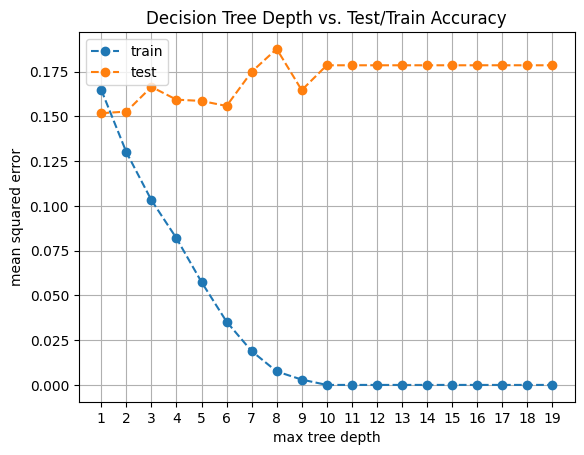

In [ ]:
# Tune Depth and plot train/test MSE
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth=d, random_state=42).fit(X_train_scaled, y_train)
    y_train_preds = dtree.predict(X_train_scaled)
    y_test_preds = dtree.predict(X_test_scaled)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label='train')
plt.plot(range(1, 20), test_scores, '--o', label='test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')
plt.show()


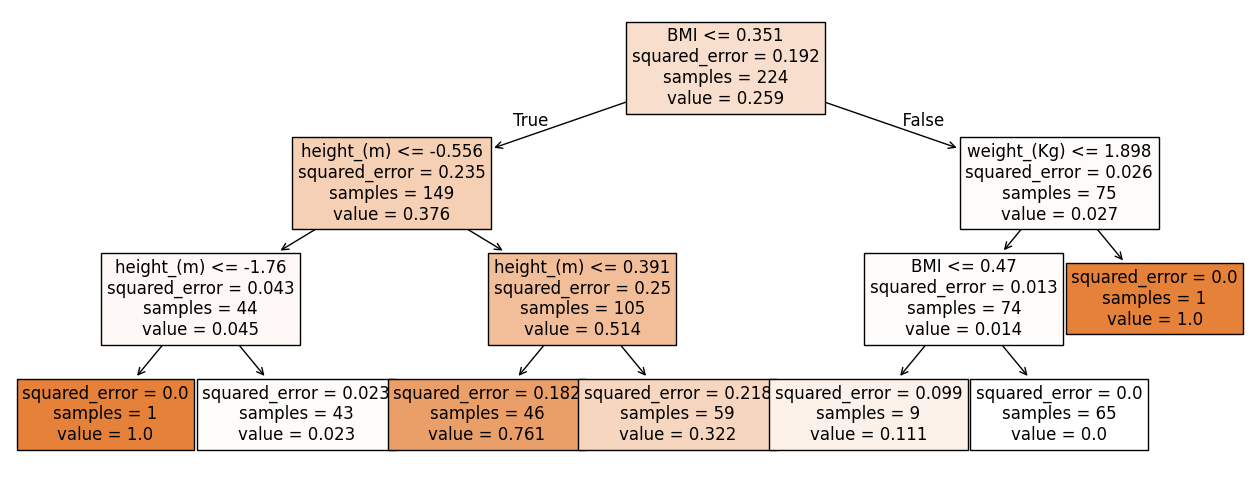

In [51]:
#Tree
dtree = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_train_scaled, y_train)


plt.figure(figsize=(16, 6))
plot_tree(dtree, filled=True, feature_names=features, fontsize=12)
plt.show()

In [52]:
#MSE Train Data
y_train_preds = dtree.predict(X_train_scaled)
print("Train MSE:", mean_squared_error(y_train, y_train_preds))

Train MSE: 0.10319890278808076


In [53]:
# MSE Test Data
y_test_preds = dtree.predict(X_test_scaled)
print("Test MSE:", mean_squared_error(y_test, y_test_preds))

Test MSE: 0.16649499477414315


In [ ]:
# Variable Importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
height_(m),0.241394
weight_(Kg),0.418303
age,0.137030
BMI,0.174364
